In [3]:
!pip install -q opencv-python

Processed: images1.jpeg


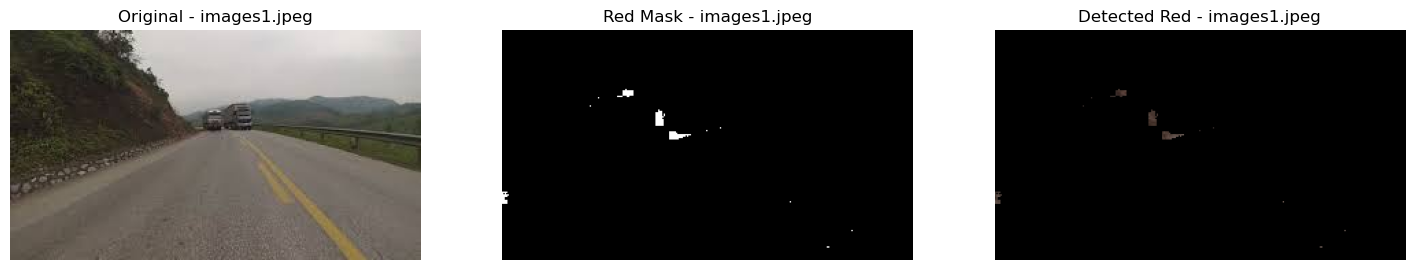

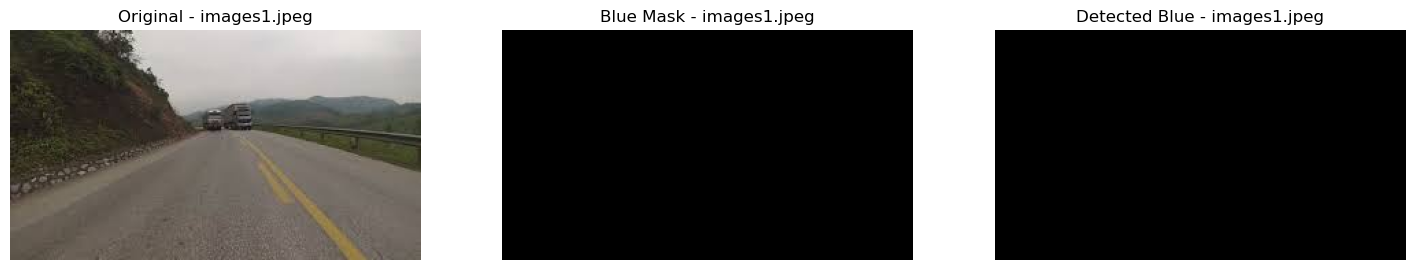

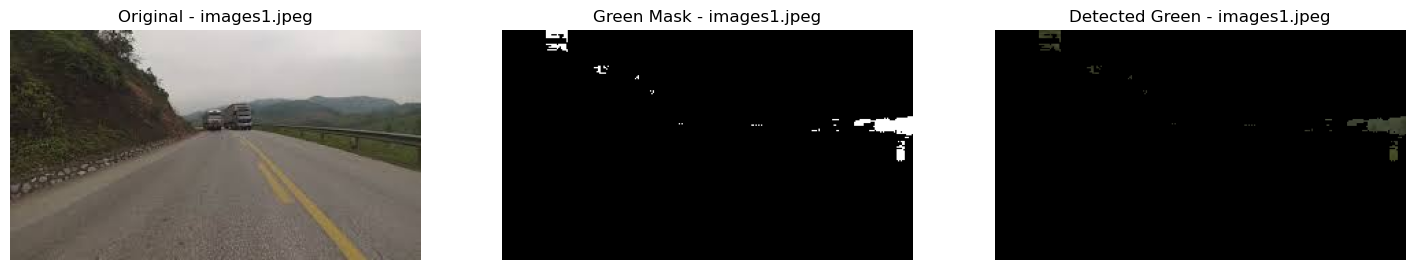

Processed: images2.jpeg


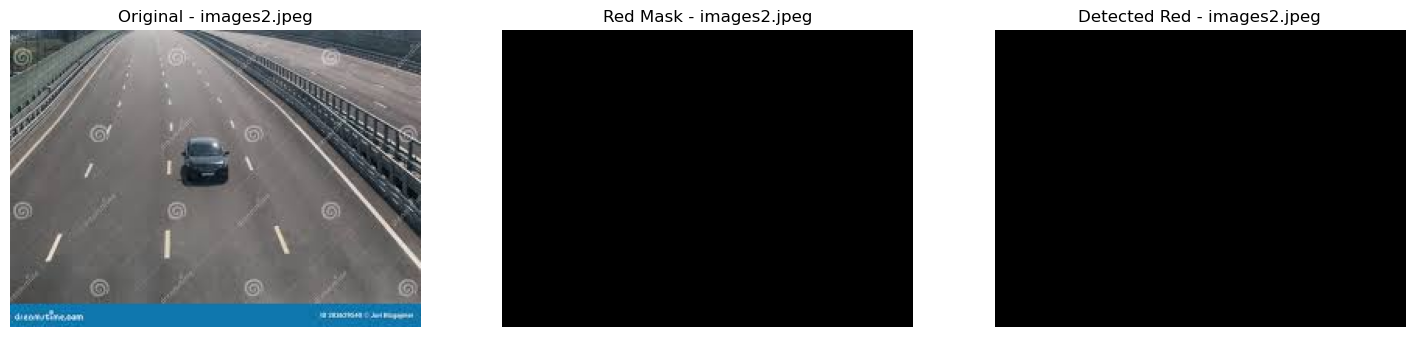

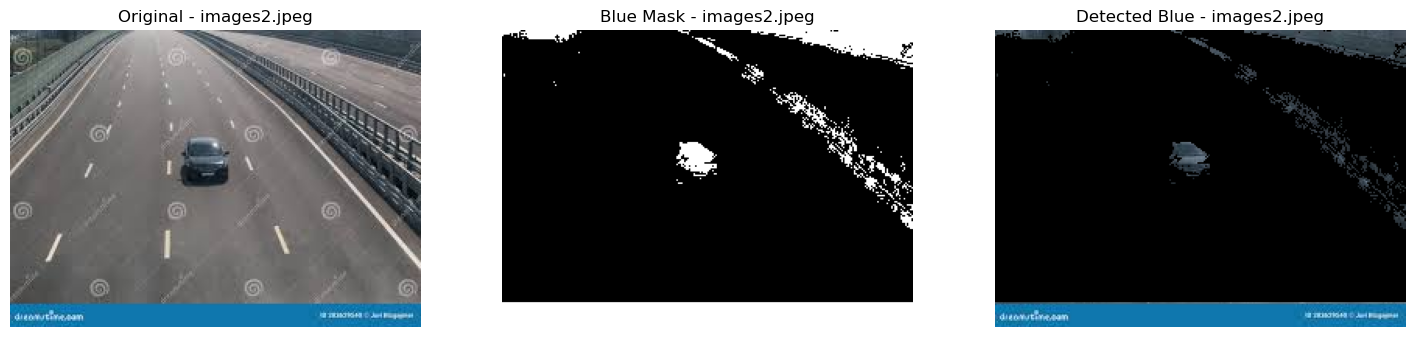

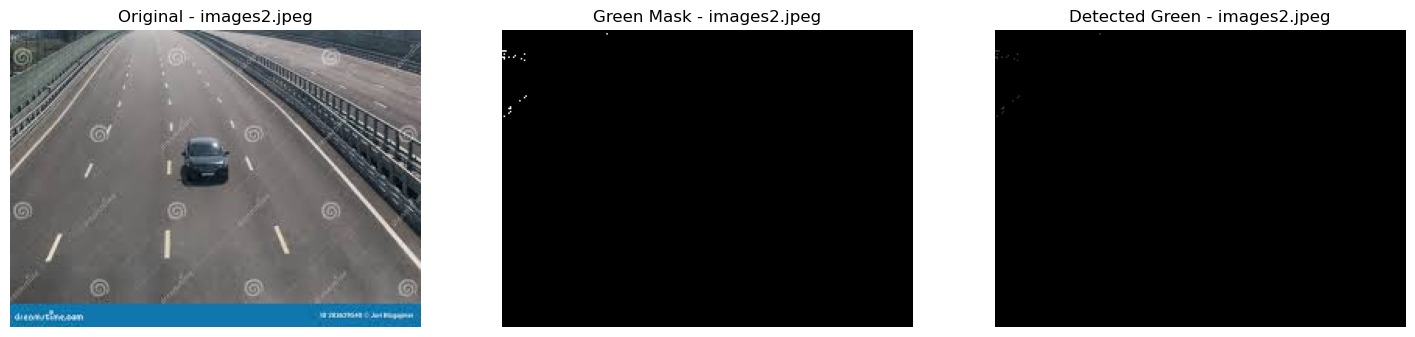

Processed: images.jpeg


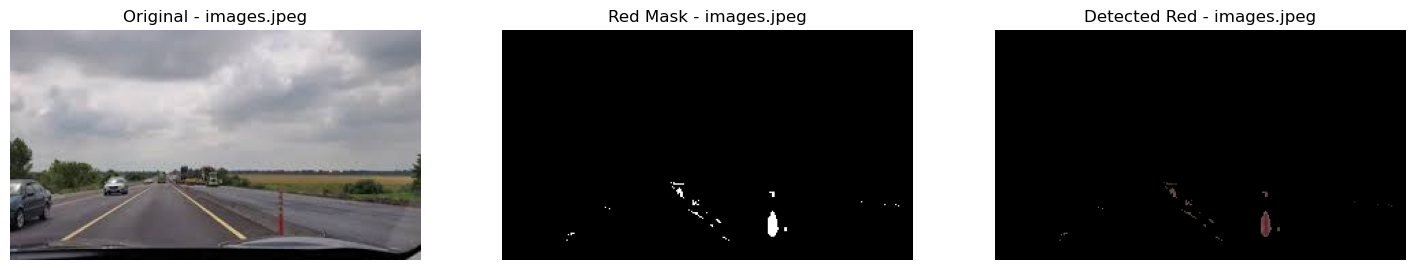

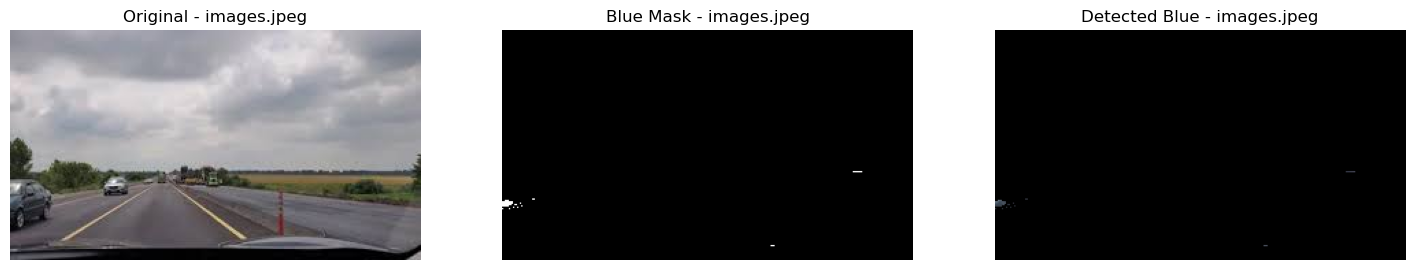

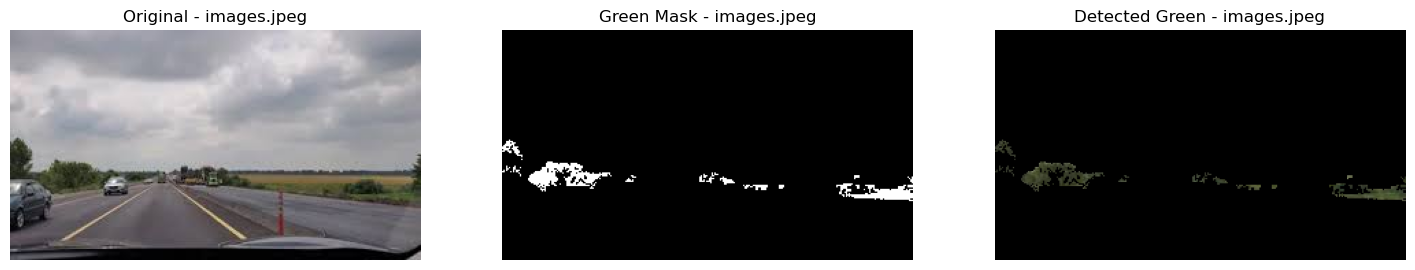

Processed: images3.jpeg


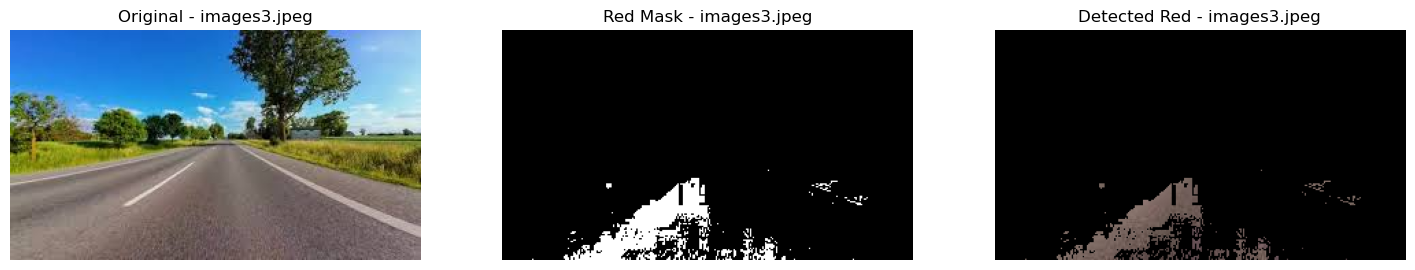

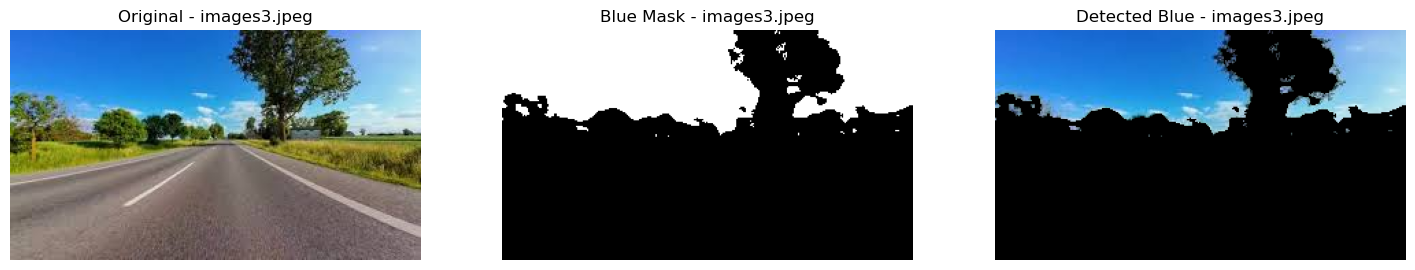

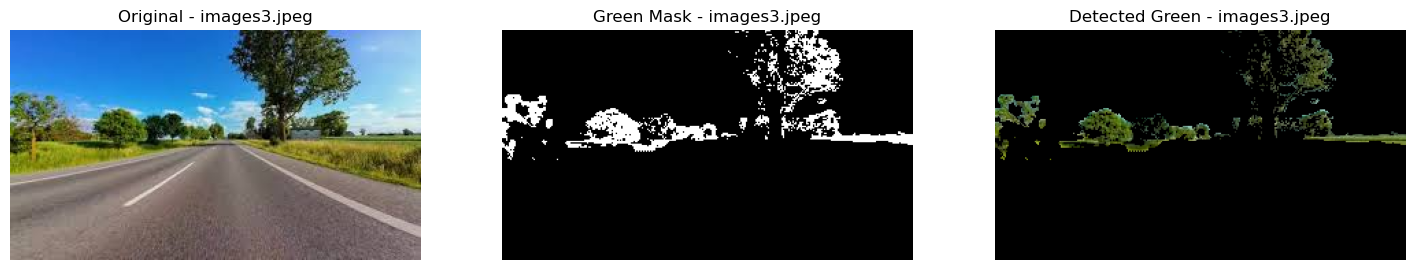

Processed: images4.jpeg


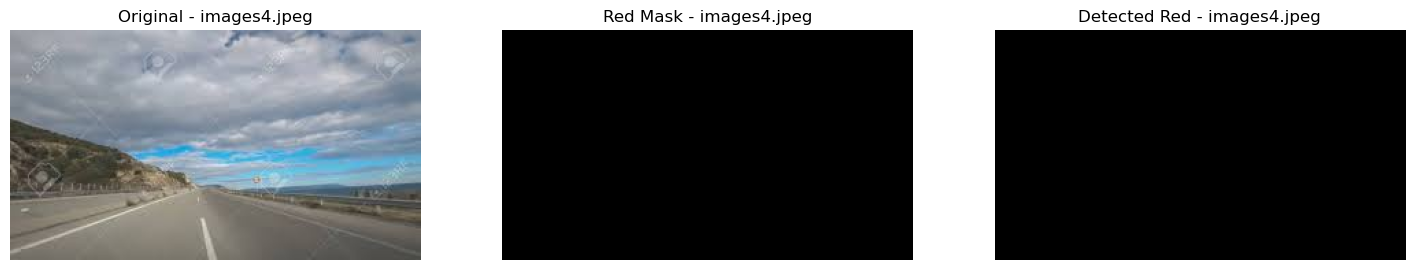

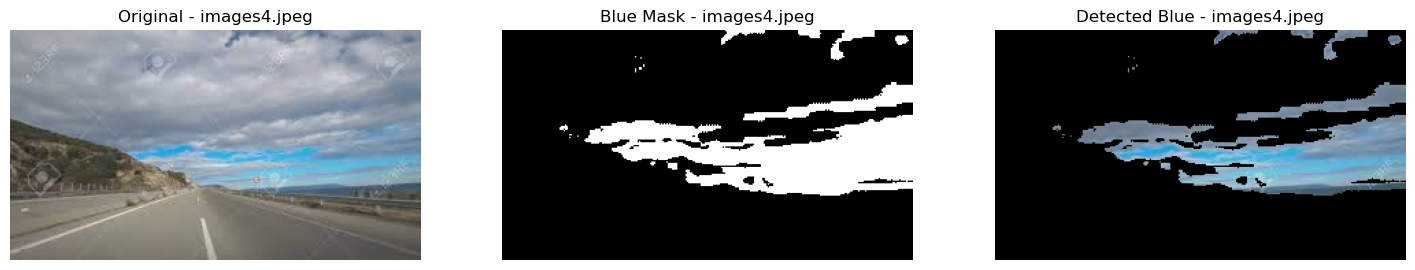

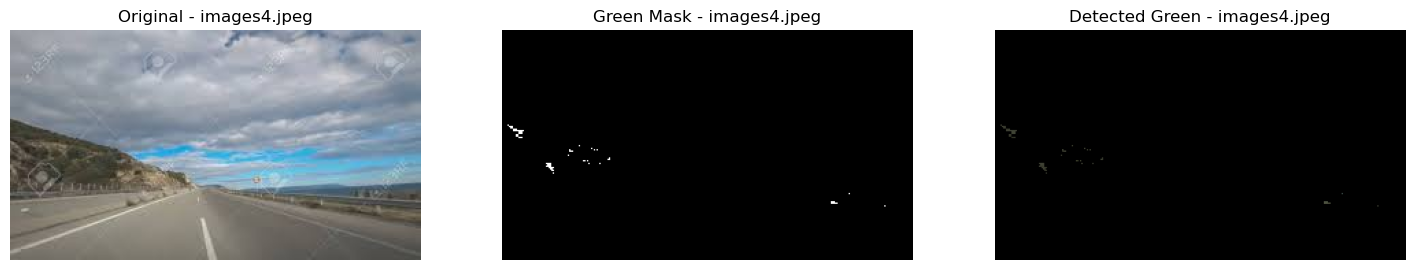

Processed: images5.jpeg


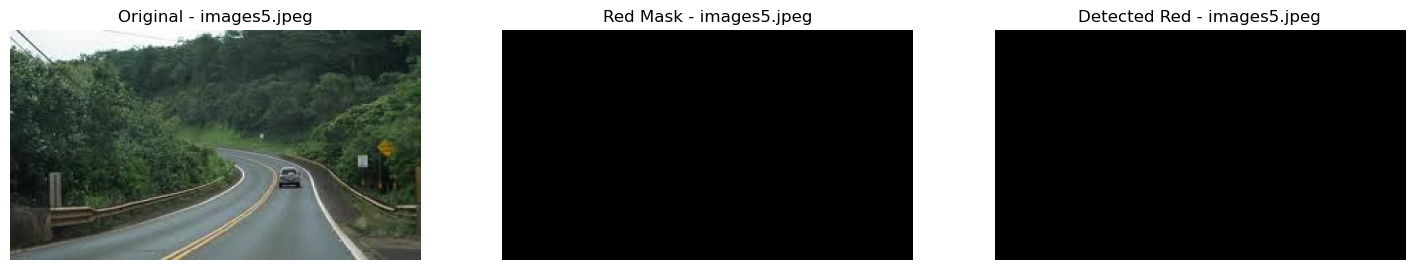

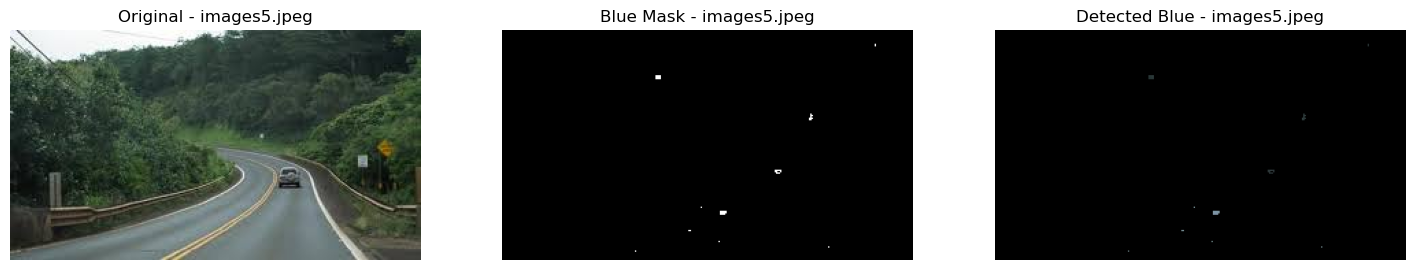

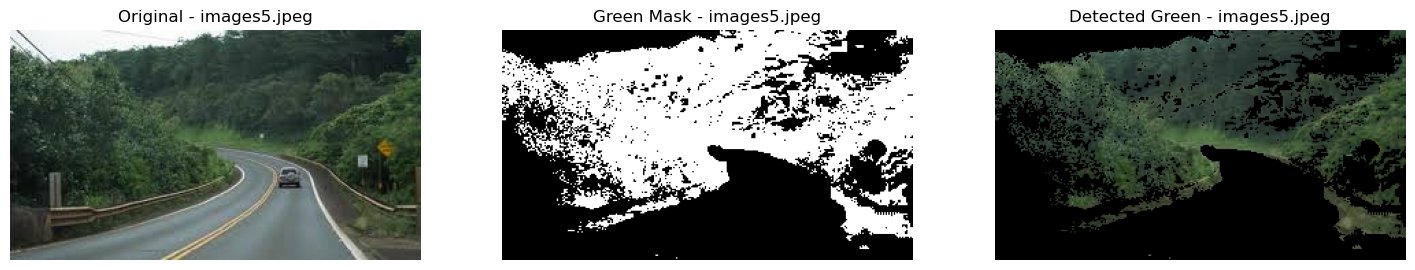

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to plot images in sets of 3: Original, Mask, and Detected
def plot_images(original, mask, detected, color_name, file_name):
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original - {file_name}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"{color_name} Mask - {file_name}")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
    plt.title(f"Detected {color_name} - {file_name}")
    plt.axis('off')
    
    plt.show()

# Define broader HSV color ranges
# Red (split into two ranges due to hue wrapping)
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Blue
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Green
lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

# Process each image in the current folder
current_folder = os.getcwd()

for file_name in os.listdir(current_folder):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        # Load the image
        file_path = os.path.join(current_folder, file_name)
        image = cv2.imread(file_path)
        if image is None:
            print(f"Skipping {file_name}: Unable to read image.")
            continue
        
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # Create masks for red
        mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
        mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
        red_mask = cv2.bitwise_or(mask_red1, mask_red2)
        detected_red = cv2.bitwise_and(image, image, mask=red_mask)
        
        # Create masks for blue
        blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
        detected_blue = cv2.bitwise_and(image, image, mask=blue_mask)
        
        # Create masks for green
        green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
        detected_green = cv2.bitwise_and(image, image, mask=green_mask)
        
        # Print the processing status
        print(f"Processed: {file_name}")
        
        # Plot the results for red
        plot_images(image, red_mask, detected_red, "Red", file_name)
        # Plot the results for blue
        plot_images(image, blue_mask, detected_blue, "Blue", file_name)
        # Plot the results for green
        plot_images(image, green_mask, detected_green, "Green", file_name)


Processed: images1.jpeg


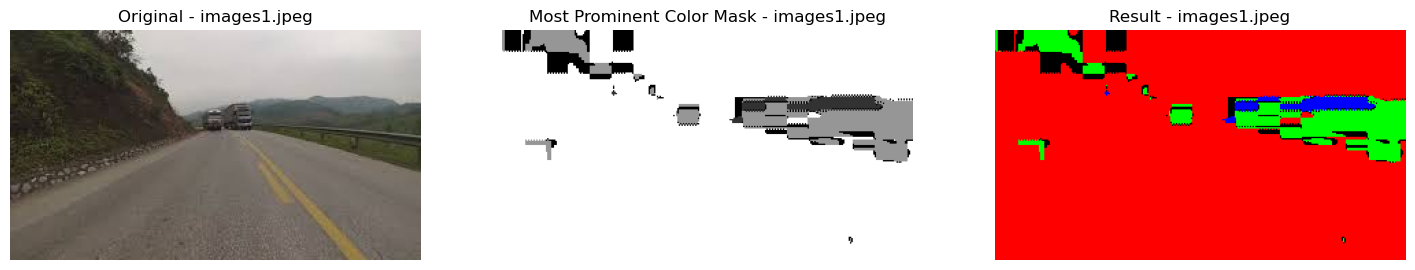

Processed: images2.jpeg


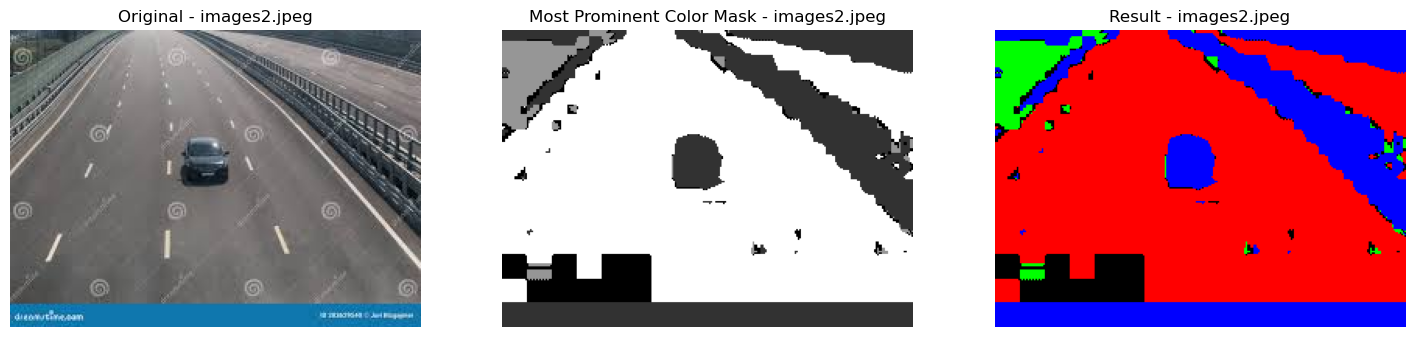

Processed: images.jpeg


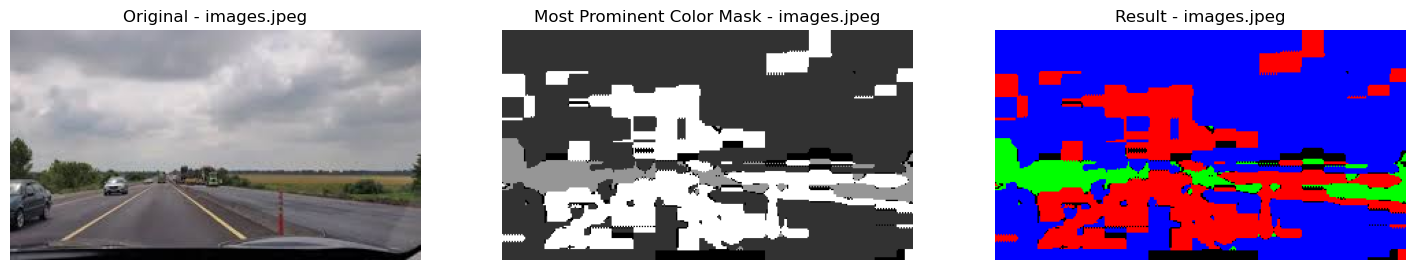

Processed: images3.jpeg


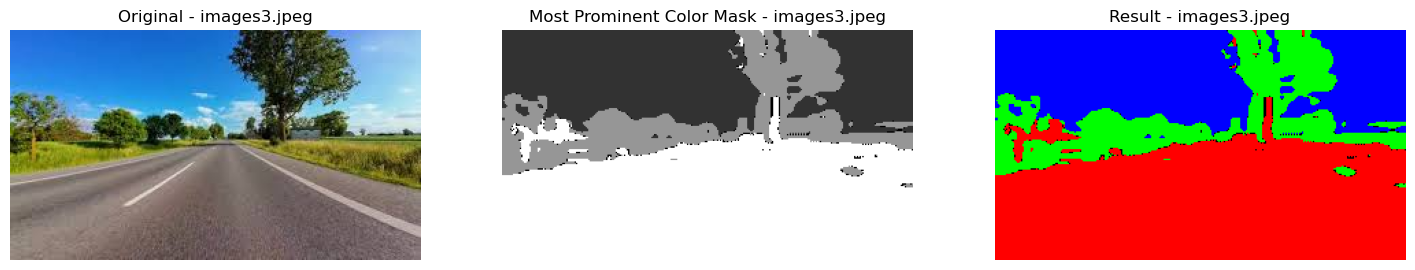

Processed: images4.jpeg


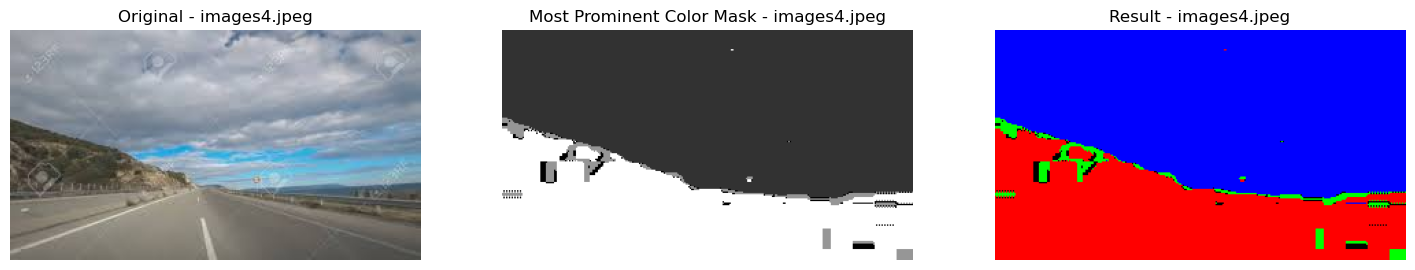

Processed: images5.jpeg


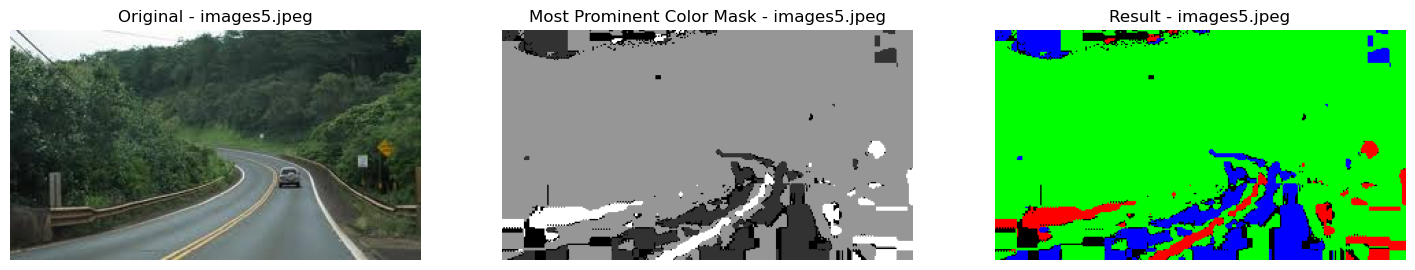

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to plot images: Original, Most Prominent Color Mask, and Result
def plot_images(original, prominent_mask, prominent_image, file_name):
    plt.figure(figsize=(18, 6))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original - {file_name}")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(prominent_mask, cmap='gray')
    plt.title(f"Most Prominent Color Mask - {file_name}")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(prominent_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Result - {file_name}")
    plt.axis('off')
    
    plt.show()

# Process each image in the current folder
current_folder = os.getcwd()

for file_name in os.listdir(current_folder):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        # Load the image
        file_path = os.path.join(current_folder, file_name)
        image = cv2.imread(file_path)
        if image is None:
            print(f"Skipping {file_name}: Unable to read image.")
            continue
        
        # Split the image into its color channels
        blue_channel, green_channel, red_channel = cv2.split(image)
        
        # Determine the most prominent color per pixel
        prominent_mask = np.zeros_like(blue_channel)
        prominent_image = np.zeros_like(image)
        
        # Create masks for each color
        red_mask = (red_channel > green_channel) & (red_channel > blue_channel)
        green_mask = (green_channel > red_channel) & (green_channel > blue_channel)
        blue_mask = (blue_channel > red_channel) & (blue_channel > green_channel)
        
        # Assign mask values
        prominent_mask[red_mask] = 255
        prominent_mask[green_mask] = 150
        prominent_mask[blue_mask] = 50
        
        # Assign prominent color to the result image
        prominent_image[red_mask] = [0, 0, 255]   # Red
        prominent_image[green_mask] = [0, 255, 0]  # Green
        prominent_image[blue_mask] = [255, 0, 0]  # Blue
        
        # Print the processing status
        print(f"Processed: {file_name}")
        
        # Plot the images
        plot_images(image, prominent_mask, prominent_image, file_name)
